Load Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

Preprocessing

In [2]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(breast_cancer.data , breast_cancer.target , test_size=0.2)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Calculate Metrics

In [4]:
from sklearn.metrics import accuracy_score,precision_score , recall_score
def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)
    precision= precision_score(y_true=y_test,y_pred=y_pred_test)
    recall = recall_score(y_true=y_test,y_pred=y_pred_test)
    print(f"accuracy train: {acc_train}   accuracy test: {acc_test}    precision: {precision}    recall: {recall}")
    return acc_train,acc_test,precision,recall



Classification

1- Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(x_train,y_train)

GaussianNB()

In [6]:
y_pred_train = model_naive_bayes.predict(x_train)
y_pred_test = model_naive_bayes.predict(x_test)
acc_train_NB,acc_test_NB,precision_NB,recall_NB = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9296703296703297   accuracy test: 0.956140350877193    precision: 0.9861111111111112    recall: 0.9466666666666667


2- KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=8 , leaf_size= 32)
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=32, n_neighbors=8)

In [8]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)
acc_train_KNN,acc_test_KNN,precision_KNN,recall_KNN = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9736263736263736   accuracy test: 0.9649122807017544    precision: 1.0    recall: 0.9466666666666667


3 - Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth= 100, min_samples_split=10 , criterion='gini')
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=100, min_samples_split=10)

In [11]:
y_pred_train = decision_tree.predict(x_train)
y_pred_test = decision_tree.predict(x_test)
acc_train_DT,acc_test_DT,precision_DT,recall_DT = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9868131868131869   accuracy test: 0.9298245614035088    precision: 0.935064935064935    recall: 0.96


4- Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier( n_estimators= 450 , max_depth= 128 , min_samples_split=6)
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=128, min_samples_split=6, n_estimators=450)

In [13]:
y_pred_train = random_forest.predict(x_train)
y_pred_test = random_forest.predict(x_test)
acc_train_RF,acc_test_RF,precision_RF,recall_RF = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9978021978021978   accuracy test: 0.9649122807017544    precision: 1.0    recall: 0.9466666666666667


5- SVM

In [14]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)


SVC()

In [15]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)
acc_train_SVM,acc_test_SVM,precision_SVM,recall_SVM = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9802197802197802   accuracy test: 0.9824561403508771    precision: 1.0    recall: 0.9733333333333334


6- Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred_train = logistic_regression.predict(x_train)
y_pred_test = logistic_regression.predict(x_test)
acc_train_LR,acc_test_LR,precision_LR,recall_LR = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9648351648351648   accuracy test: 0.9912280701754386    precision: 1.0    recall: 0.9866666666666667


7- ANN

In [18]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes= 2056)
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=2056)

In [19]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)
acc_train_ANN,acc_test_ANN,precision_ANN,recall_ANN = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9868131868131869   accuracy test: 0.9736842105263158    precision: 0.9864864864864865    recall: 0.9733333333333334


Comparison

1- Train Accuracy

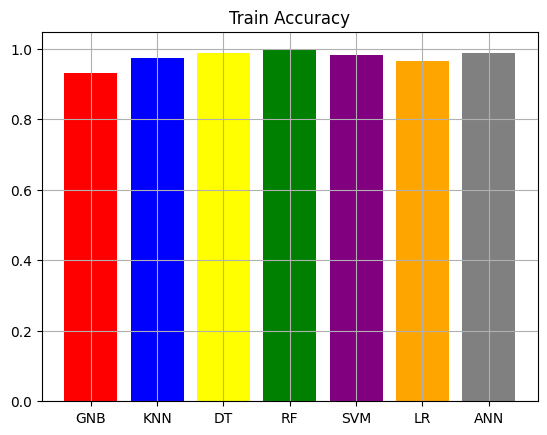

In [32]:
import matplotlib.pyplot as plt

acc_train = [acc_train_NB, acc_train_KNN, acc_train_DT, acc_train_RF, acc_train_SVM,acc_train_LR,acc_train_ANN]
title = ["GNB" , "KNN" , "DT" , "RF" , "SVM" , "LR" , "ANN"]
colors = ["red" , "blue" , "yellow" , "green" , "purple" , "orange" , "grey"]
plt.bar(title,acc_train,color=colors)
plt.title("Train Accuracy")
plt.grid()
plt.show()

2- Test Accuracy

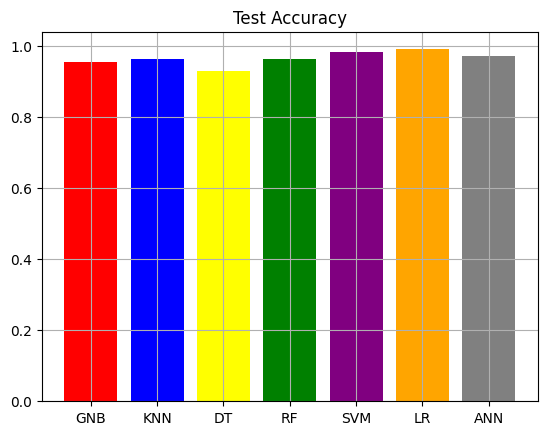

In [31]:
acc_test = [acc_test_NB, acc_test_KNN, acc_test_DT, acc_test_RF, acc_test_SVM,acc_test_LR,acc_test_ANN]
title = ["GNB" , "KNN" , "DT" , "RF" , "SVM" , "LR" , "ANN"]
colors = ["red" , "blue" , "yellow" , "green" , "purple" , "orange" , "grey"]
plt.bar(title,acc_test,color=colors)
plt.title("Test Accuracy")
plt.grid()
plt.show()

3- Precision

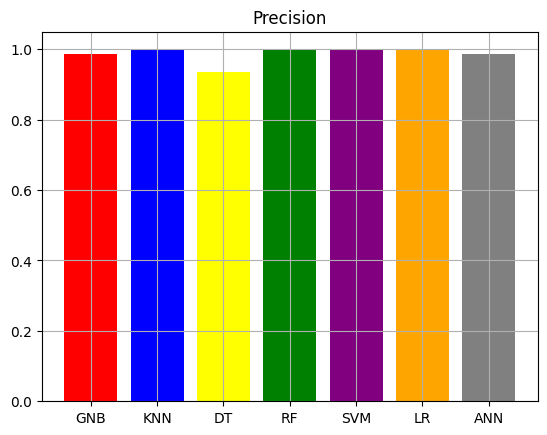

In [30]:
precision = [precision_NB, precision_KNN, precision_DT, precision_RF, precision_SVM,precision_LR,precision_ANN]
title = ["GNB" , "KNN" , "DT" , "RF" , "SVM" , "LR" , "ANN"]
colors = ["red" , "blue" , "yellow" , "green" , "purple" , "orange" , "grey"]
plt.bar(title,precision,color=colors)
plt.title("Precision")
plt.grid()
plt.show()

4- Recall

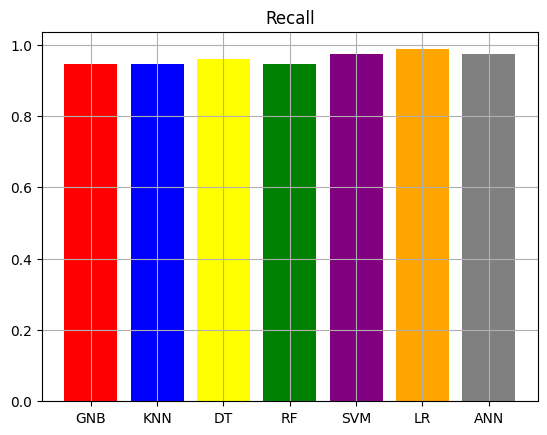

In [33]:
recall = [recall_NB, recall_KNN, recall_DT, recall_RF, recall_SVM,recall_LR,recall_ANN]
title = ["GNB" , "KNN" , "DT" , "RF" , "SVM" , "LR" , "ANN"]
colors = ["red" , "blue" , "yellow" , "green" , "purple" , "orange" , "grey"]
plt.bar(title,recall,color=colors)
plt.title("Recall")
plt.grid()
plt.show()